In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib import colors as mcolors

In [ ]:
# !pip install matplotlib-venn

In [10]:
output_file = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/GAMLSS_statiscal.csv"
df2 = pd.read_csv(output_file)
# print(df2)
print(df2['bestMethod_fitted'].unique())
print(df2['bestMethod_predicted'].unique())


['GAMLSS.MW.Outlier.II' 'GAMLSS.MW' 'GAMLSS.MW and GAMLSS.MW.Outlier.I'
 'GAMLSS.MW.Outlier.I']
['GAMLSS.MW.Outlier.I' 'GAMLSS.MW' 'GAMLSS.MW.Outlier.II'
 'GAMLSS.MW and GAMLSS.MW.Outlier.I']


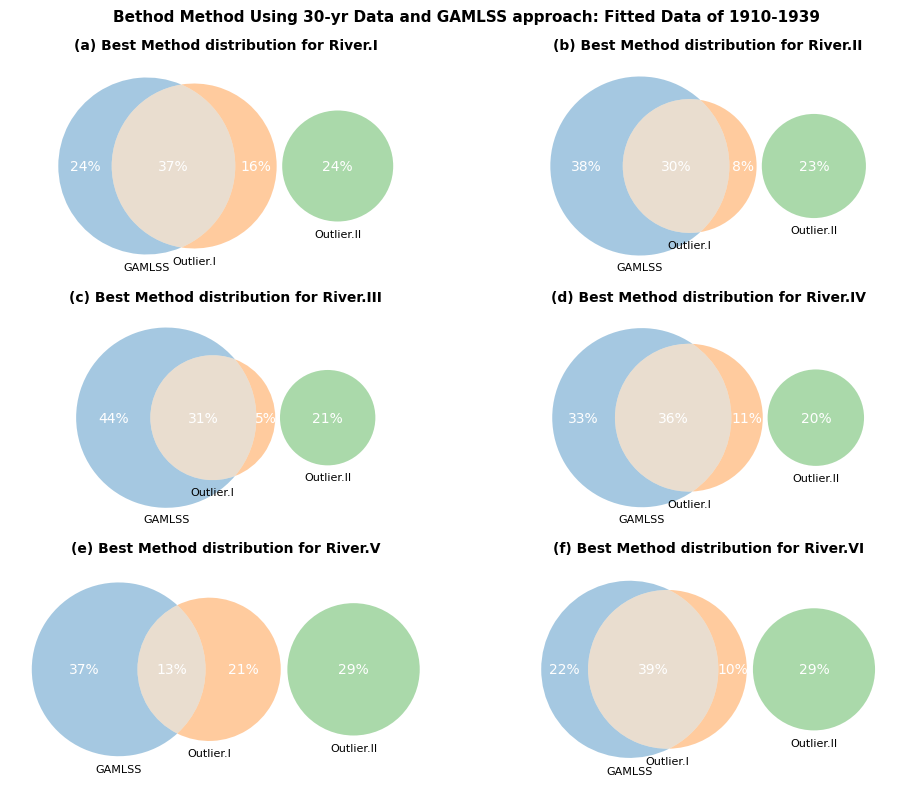

In [6]:
df = df2
# Figure 1: Best Method distribution for each river
unique_rivers = sorted(df['rivers'].unique())

# Prepare color palette
color_palette = [mcolors.TABLEAU_COLORS[key] for key in mcolors.TABLEAU_COLORS.keys()]

# Initialize subplot
fig, axes = plt.subplots(3, 2, figsize=(10,8))

# Assign subplot titles
titles = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# Flatten axes for easier iteration
axes = axes.flatten()

# For each unique river
for i, river in enumerate(unique_rivers):
    # Subset dataframe to only include rows with this river
    river_df = df[df['rivers'] == river]

    # Total number of rows for this river
    total = len(river_df)

    # Find the counts of each method
    method_counts = river_df['bestMethod_fitted'].value_counts()

    # Prepare a dictionary to store the counts of each combination
    counts = {'100': 0, '010': 0, '001': 0, '110': 0, '101': 0, '011': 0, '111': 0}

    # Add the counts to the appropriate combination
    for method, count in method_counts.items():
        if method == 'GAMLSS.MW':
            counts['100'] += count
        elif method == 'GAMLSS.MW.Outlier.I':
            counts['010'] += count
        elif method == 'GAMLSS.MW.Outlier.II':
            counts['001'] += count
        elif method == 'GAMLSS.MW and GAMLSS.MW.Outlier.I':
            counts['110'] += count
        elif method == 'GAMLSS.MW and GAMLSS.MW.Outlier.II':
            counts['101'] += count
        elif method == 'GAMLSS.MW.Outlier.I and GAMLSS.MW.Outlier.II':
            counts['011'] += count
        elif method == 'GAMLSS.MW and GAMLSS.MW.Outlier.I and GAMLSS.MW.Outlier.II':
            counts['111'] += count

    # Convert counts to percentages and round
    counts = {key: round((value / total) * 100) for key, value in counts.items()}

    # # Create the venn diagram
    venn = venn3(subsets=counts, set_labels=('GAMLSS', 'Outlier.I', 'Outlier.II'), ax=axes[i], 
                  subset_label_formatter=lambda x: f'{x}%', set_colors=color_palette[:3])
  

    # Change color and alpha
    for text in venn.set_labels:
        text.set_fontsize(8)  # Reduce fontsize here to make circles smaller

    for subset in venn.subset_labels:
        if subset is not None:
            subset.set_fontsize(10)  # Reduce fontsize here to make circles smaller
            subset.set_color('white')


    # Set title for this subplot
    axes[i].set_title(f"{titles[i]} Best Method distribution for {river}", fontsize=10, fontweight='bold')

fig.suptitle('Bethod Method Using 30-yr Data and GAMLSS approach: Fitted Data of 1910-1939', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

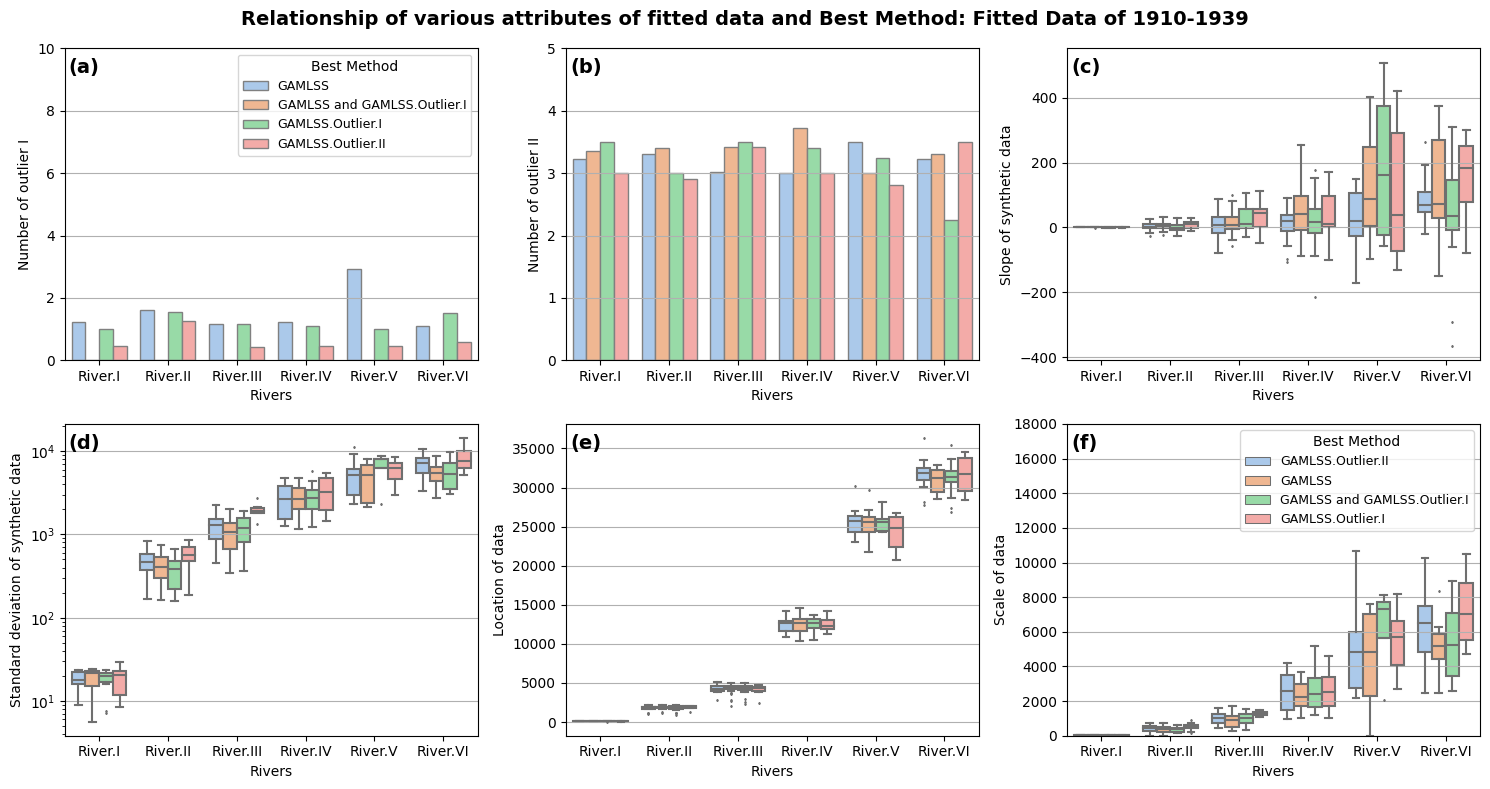

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the variables to plot
varsname = ['count_outlier1', 'count_outlier2', 'SlopeData', 'StdData', 'location', 'scale']
ylables = ['Number of outlier I', 'Number of outlier II', 'Slope of synthetic data', 'Standard deviation of synthetic data', 'Location of data', 'Scale of data']


# Define the mapping dictionary for replacement
mapping = {
    'GAMLSS.MW.Outlier.I': 'GAMLSS.Outlier.I',
    'GAMLSS.MW': 'GAMLSS',
    'GAMLSS.MW.Outlier.II': 'GAMLSS.Outlier.II',
    'GAMLSS.MW and GAMLSS.MW.Outlier.I': 'GAMLSS and GAMLSS.Outlier.I'
}

# Replace the values in 'bestMethod_fitted' column using the mapping dictionary
df2['bestMethod_fitted'] = df2['bestMethod_fitted'].replace(mapping)
df2['bestMethod_predicted'] = df2['bestMethod_predicted'].replace(mapping)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Order of rivers for sorting
river_order = ['River.I', 'River.II', 'River.III', 'River.IV', 'River.V', 'River.VI']

# Light color palette
light_palette = sns.color_palette('pastel')

# Iterate over variables and plot in subplots
for i, ax in enumerate(axes.flatten()):
    if i in [0, 1]:  # Use bar plot for subplots (a) and (b)
        # Get the mean values for each river and bestMethod combination
        mean_df = df2.groupby(['rivers', 'bestMethod_fitted'])[varsname[i]].mean().reset_index()
        
        # Convert 'rivers' column to ordered categorical variable
        mean_df['rivers'] = pd.Categorical(mean_df['rivers'], categories=river_order, ordered=True)
        
        # Bar plot with light color palette
        sns.barplot(x='rivers', y=varsname[i], hue='bestMethod_fitted', data=mean_df, ax=ax, edgecolor='grey', palette=light_palette)
        
        if i == 0:  # Show legend for subplot (a)
            ax.legend(title='Best Method', fontsize=9)
            ax.set_ylim(0, 10)
        else:
            ax.get_legend().remove()  # Remove legend for subplot (b)
            ax.set_ylim(0, 5)
            
    else:  # Use box plot for other subplots
        # Melt the dataframe for the current variable
        melted_df = pd.melt(df2, id_vars=['rivers', 'bestMethod_fitted'], value_vars=[varsname[i]], var_name='Variable')
        
        # Convert 'rivers' column to ordered categorical variable
        melted_df['rivers'] = pd.Categorical(melted_df['rivers'], categories=river_order, ordered=True)
        
        # Box plot with light color palette
        if varsname[i] == 'StdData':
            ax.set_yscale('log')  # Set y-axis to logarithmic scale for 'StdData'
        
        sns.boxplot(x='rivers', y='value', hue='bestMethod_fitted', data=melted_df, ax=ax, fliersize=1, palette=light_palette)  # Adjust fliersize as desired
        if i == 5:  # Show legend for subplot (c)
            ax.legend(title='Best Method', fontsize=9)
            ax.set_ylim(0, 18000)
        else:
            ax.get_legend().remove()  # Remove legend for other variables

    ax.set_xlabel('Rivers')
    ax.set_ylabel(ylables[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.yaxis.grid(True)

# Add subplot labels
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate(axes.flatten()):
    ax.text(0.01, 0.92, subplot_labels[i], transform=ax.transAxes, fontsize=14, fontweight='bold')

# Adjust spacing between subplots
fig.suptitle('Relationship of various attributes of fitted data and Best Method: Fitted Data of 1910-1939', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/GAMLSS_results/gamlss-f03-ExploreBestMethods_fitted.png', dpi=300)
# Display the plot
plt.show()


In [105]:
print(df2)

                                                   fname        experiment  \
0      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
1      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
2      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
3      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
4      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
...                                                  ...               ...   
63426  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63427  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63428  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63429  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63430  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   

        Function      location        scale     shape    rivers